## Pleiotropy anaysis for asthma, waist and t2d

## GSMR: Generalised Summary-data-based Mendelian Randomisation
The GSMR analysis requires a reference sample with individual level genotypes (in PLINK binary format) for LD estimation. The inputs are two text or compressed text (gz format) files containing the filepaths of the GWAS summary data (in [GCTA-COJO format](https://yanglab.westlake.edu.cn/software/gcta/#COJO)). The first one is for exposures and the second one is for outcomes.

It is possible to run using gsmr R-package or GCTA implemented module. This GCTA module runs the same analysis as in the R version of GSMR but is faster and more flexible.


# GSMR installation to my home directory


In [2]:
# gsmr requires the R-package(s)
install.packages(c('survey'));
# install gsmr
install.packages("http://cnsgenomics.com/software/gsmr/static/gsmr_1.0.9.tar.gz",repos=NULL,type="source")

This generates a **'Peer certificate cannot be authenticated with given CA certificates' error**.  
So I had to download the installation file firdt to my home directory to by pass an authentication certificate.


In [4]:
%cd ~

/mnt/mfs/hgrcgrid/homes/bst2126

In [6]:
wget https://yanglab.westlake.edu.cn/software/gsmr/static/gsmr_1.0.9.tar.gz

--2022-04-04 14:55:16--  https://yanglab.westlake.edu.cn/software/gsmr/static/gsmr_1.0.9.tar.gz
Resolving bcp3.cumc.columbia.edu (bcp3.cumc.columbia.edu)... 10.139.211.159
Connecting to bcp3.cumc.columbia.edu (bcp3.cumc.columbia.edu)|10.139.211.159|:8080... connected.
Proxy request sent, awaiting response... 200 OK
Length: 1175860 (1.1M) [application/octet-stream]
Saving to: ‘gsmr_1.0.9.tar.gz’

gsmr_1.0.9.tar.gz   100%[===================>]   1.12M   240KB/s    in 4.8s    

2022-04-04 14:55:22 (240 KB/s) - ‘gsmr_1.0.9.tar.gz’ saved [1175860/1175860]



In [ ]:
# had to install these manually with R shell
# gsmr requires the R-package(s)
install.packages(c('survey'));
# survey package needs R version > 3.5
# install gsmr
install.packages("~/gsmr_1.0.9.tar.gz",repos=NULL,type="source")

## Data File

GSMR requires a data file that includes the effect size, std error, p value, and GWAS sample size for each phenotype.

Data file location and steps in workflow are described by Fabiha:

> https://github.com/statgenetics/UKBB_GWAS_dev/blob/master/analysis/pleiotropy/data_description.ipynb

> https://github.com/statgenetics/UKBB_GWAS_dev/blob/master/analysis/pleiotropy/workflow_gsmr_data_031622.ipynb


In [1]:
%cd /mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum

/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum

In [1]:
library("gsmr")
setwd("/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum")

In [2]:
gsmr_data <- read.csv("asthma_v_t2d_gsmr_data", sep=" ")
head(gsmr_data)

,SNP,a1,a2,a1_freq,bzx,bzx_se,bzx_pval,bzx_n,bzy,bzy_se,bzy_pval,bzy_n
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,rs545409685,C,T,0.002660,0.116773000,0.07112890,0.1006505,339345,0.03862570,0.1000360,0.69941026,336074
2,7:27869261_CAGTA_C,C,CAGTA,0.001502,0.036829900,0.09843050,0.7082768,339345,0.10838600,0.1401650,0.43936150,336074
3,rs73075348,G,A,0.056628,-0.000203885,0.01522620,0.9893163,339345,0.01622460,0.0215218,0.45092779,336074
4,rs6948467,A,G,0.392766,-0.002206310,0.00722281,0.7600130,339345,-0.02054410,0.0102407,0.04484252,336074
5,rs73075354,G,C,0.116197,0.012311100,0.01100070,0.2630886,339345,0.03858900,0.0156277,0.01353879,336074
6,rs35410592,A,C,0.009441,-0.015885700,0.03695520,0.6672952,339345,0.00427717,0.0522587,0.93476900,336074


In [5]:
dim(gsmr_data)

[1] 2065   12

In [3]:
snp_coeff_id = scan("asthma_v_t2d_gcta64.result.xmat.gz", what="", nlines=1)
snp_coeff = read.table("asthma_v_t2d_gcta64.result.xmat.gz", header=F, skip=2)

In [4]:
# Match the SNP genotype data with the summary data
snp_id = Reduce(intersect, list(gsmr_data$SNP, snp_coeff_id))
snp_id

[1] "rs73075348"  "rs112759592" "rs10281008"  "rs117933100" "rs58651394" 
 [6] "rs62451072"  "rs17620013"  "rs17692895"  "rs73083371"  "rs116990708"
[11] "rs58753113"  "rs720659"    "rs10452749"  "rs80197206"  "rs73083390" 
[16] "rs10232181"  "rs7806217"   "rs193"       "rs17156005"  "rs67705163" 
[21] "rs10486567"  "rs3919460"   "rs117034173" "rs28657749"  "rs17156078" 
[26] "rs62451150"  "rs78975149"  "rs61648985"  "rs10237946"  "rs79909443" 
[31] "rs253310"    "rs116974921" "rs117929884" "rs73301337"  "rs12671522" 
[36] "rs77214245"  "rs6956423"   "rs118186994" "rs77046554"  "rs17623527" 
[41] "rs11763515"  "rs6945134"   "rs17156127"  "rs56311485"  "rs12536791" 
[46] "rs112914067" "rs117621905" "rs76334155"  "rs34325103"  "rs35053797" 
[51] "rs17624621"  "rs6462063"   "rs74756543"  "rs62449904"  "rs10268254" 
[56] "rs10486576"  "rs41535351"  "rs111519725" "rs13234714"  "rs113404264"
[61] "rs6977730"   "rs76730676"  "rs75040112"  "rs10274928"  "rs2158623"  
[66] "rs73072534"  "rs77740984"  "rs757729"    "rs57585717"  "rs78856909" 
[71] "rs4722759"   "rs62449907"  "rs6962289"   "rs62449929"  "rs2189965"  
[76] "rs113735840" "rs864745"    "rs849140"    "rs849141"    "rs4719925"  
[81] "rs1635852"   "rs1708299"   "rs79013867"  "rs530649"    "rs520161"   
[86] "rs849335"    "rs550448"    "rs849315"    "rs1513270"   "rs73078484" 
[91] "rs58462233"  "rs56142710"  "rs73076597"  "rs478266"    "rs475615"   
[96] "rs849325"

In [5]:
gsmr_data = gsmr_data[match(snp_id, gsmr_data$SNP),]


In [6]:
snp_order = match(snp_id, snp_coeff_id)
snp_coeff_id = snp_coeff_id[snp_order]
snp_coeff = snp_coeff[, snp_order]


In [7]:
sum(is.na(snp_coeff)) #count NA snp coefficients if any.

[1] 67606

In [8]:
snp_coeff[is.na(snp_coeff)] <- 0 # Recode NAs as 0.

In [10]:
sum(is.na(snp_coeff))

[1] 0

In [9]:
# Calculate the LD correlation matrix
ldrho = cor(snp_coeff)

In [10]:
# Check the size of the correlation matrix and double-check if the order of the SNPs in the LD correlation matrix is consistent with that in the GWAS summary data
colnames(ldrho) = rownames(ldrho) = snp_coeff_id

In [11]:
dim(ldrho) 

[1] 96 96

In [12]:
# Show the first  rows and columns of the matrix  
ldrho[1:5,1:5]

,rs73075348,rs112759592,rs10281008,rs117933100,rs58651394
rs73075348,1.00000000,-0.04041098,-0.07996557,-0.03335595,-0.02336440
rs112759592,-0.04041098,1.00000000,-0.06602195,-0.02949000,-0.01981965
rs10281008,-0.07996557,-0.06602195,1.00000000,-0.04834999,-0.03434119
rs117933100,-0.03335595,-0.02949000,-0.04834999,1.00000000,-0.01431049
rs58651394,-0.02336440,-0.01981965,-0.03434119,-0.01431049,1.00000000


In [ ]:
# Standardization

In [13]:
snpfreq = gsmr_data$a1_freq             # allele frequencies of the SNPs
bzx = gsmr_data$bzx     # effects of the instruments on risk factor
bzx_se = gsmr_data$bzx_se       # standard errors of bzx
bzx_n = gsmr_data$bzx_n          # GWAS sample size for the risk factor
std_zx = std_effect(snpfreq, bzx, bzx_se, bzx_n)    # perform standardisation
gsmr_data$std_bzx = std_zx$b    # standardized bzx
gsmr_data$std_bzx_se = std_zx$se    # standardized bzx_se
head(gsmr_data)

std effect: 96 instruments loaded.



,SNP,a1,a2,a1_freq,bzx,bzx_se,bzx_pval,bzx_n,bzy,bzy_se,bzy_pval,bzy_n,std_bzx,std_bzx_se
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
3,rs73075348,G,A,0.056628,-0.000203885,0.0152262,0.9893163,339345,0.0162246,0.0215218,0.4509278,336074,-7.032357e-05,0.005251788
24,rs112759592,C,G,0.037919,0.011217400,0.0183894,0.5418661,339345,-0.0110040,0.0260792,0.6730650,336074,3.876631e-03,0.006355208
30,rs10281008,G,A,0.103650,0.005002890,0.0115376,0.6645673,339345,0.0126663,0.0163541,0.4386337,336074,1.726816e-03,0.003982362
36,rs117933100,C,T,0.020039,-0.005789150,0.0250778,0.8174334,339345,0.0172606,0.0356208,0.6279846,336074,-1.999619e-03,0.008662073
44,rs58651394,T,C,0.010441,0.022539600,0.0346362,0.5152073,339345,0.1005150,0.0493825,0.0418071,336074,7.771200e-03,0.011941864
51,rs62451072,T,G,0.050092,0.008891390,0.0160970,0.5806989,339345,0.0308995,0.0228575,0.1764302,336074,3.073717e-03,0.005564666


In [ ]:
# GSMR anlysis between asthma and t2d

In [16]:
bzx = gsmr_data$std_bzx    # SNP effects on the risk factor
bzx_se = gsmr_data$std_bzx_se    # standard errors of bzx
bzx_pval = gsmr_data$bzx_pval   # p-values for bzx
bzy = gsmr_data$bzy    # SNP effects on the disease
bzy_se = gsmr_data$bzy_se    # standard errors of bzy
bzy_pval = gsmr_data$bzy_pval    # p-values for bzy
n_ref = 487409    # Sample size of the reference sample # 487409 individuals in the sample file
gwas_thresh = 5e-8    # GWAS threshold to select SNPs as the instruments for the GSMR analysis
single_snp_heidi_thresh = 0.01    # p-value threshold for single-SNP-based HEIDI-outlier analysis
multi_snp_heidi_thresh = 0.01    # p-value threshold for multi-SNP-based HEIDI-outlier analysis
nsnps_thresh = 5   # the minimum number of instruments required for the GSMR analysis
heidi_outlier_flag = T    # flag for HEIDI-outlier analysis
ld_r2_thresh = 0.1    # LD r2 threshold to remove SNPs in high LD
ld_fdr_thresh = 0.05   # FDR threshold to remove the chance correlations between the SNP instruments
gsmr2_beta = 0     # 0 - the original HEIDI-outlier method; 1 - the new HEIDI-outlier method that is currently under development 
gsmr_results = gsmr(bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, ldrho, snp_coeff_id, n_ref, heidi_outlier_flag, gwas_thresh, single_snp_heidi_thresh, multi_snp_heidi_thresh, nsnps_thresh, ld_r2_thresh, ld_fdr_thresh, gsmr2_beta)    # GSMR analysis 
filtered_index=gsmr_results$used_index
cat("The estimated effect of the exposure on outcome: ",gsmr_results$bxy)

GSMR analysis: 96 instruments loaded.

There are 96 SNPs in the dataset.

Warning message in filter_summdat(snpid, bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, :
“93 non-significant SNPs were removed.”


ERROR: Error in filter_summdat(snpid, bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, : At least 5 SNPs are required. Note: this hard limit can be changed by the "nsnps_thresh".


# waist vs t2d

In [29]:
gsmr_data <- read.csv("waist_v_t2d_gsmr_data", sep=" ")
head(gsmr_data)

,SNP,a1,a2,a1_freq,bzx,bzx_se,bzx_pval,bzx_n,bzy,bzy_se,bzy_pval,bzy_n
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,rs545409685,C,T,0.002660,0.000830394,0.00997982,9.336868e-01,365499,0.03862570,0.1000360,0.69941026,336074
2,7:27869261_CAGTA_C,C,CAGTA,0.001494,-0.018772000,0.01391700,1.773838e-01,365499,0.10838600,0.1401650,0.43936150,336074
3,rs73075348,G,A,0.056610,-0.002466700,0.00213852,2.487196e-01,365499,0.01622460,0.0215218,0.45092779,336074
4,rs6948467,A,G,0.392772,-0.002577480,0.00101531,1.112910e-02,365499,-0.02054410,0.0102407,0.04484252,336074
5,rs73075354,G,C,0.116173,0.006933460,0.00154743,7.442177e-06,365499,0.03858900,0.0156277,0.01353879,336074
6,rs35410592,A,C,0.009428,-0.003141340,0.00520300,5.460067e-01,365499,0.00427717,0.0522587,0.93476900,336074


In [3]:
dim(gsmr_data)

[1] 2063   12

In [30]:
snp_coeff_id = scan("/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/waist_v_t2d_gcta64.result.xmat.gz", what="", nlines=1)
snp_coeff = read.table("/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/waist_v_t2d_gcta64.result.xmat.gz", header=F, skip=2)

In [31]:
# Match the SNP genotype data with the summary data
snp_id = Reduce(intersect, list(gsmr_data$SNP, snp_coeff_id))
snp_id

[1] "rs73075348"  "rs112759592" "rs10281008"  "rs117933100" "rs58651394" 
 [6] "rs62451072"  "rs17620013"  "rs17692895"  "rs73083371"  "rs116990708"
[11] "rs58753113"  "rs720659"    "rs10452749"  "rs80197206"  "rs73083390" 
[16] "rs10232181"  "rs7806217"   "rs193"       "rs17156005"  "rs67705163" 
[21] "rs10486567"  "rs3919460"   "rs117034173" "rs28657749"  "rs17156078" 
[26] "rs62451150"  "rs78975149"  "rs61648985"  "rs10237946"  "rs79909443" 
[31] "rs253310"    "rs116974921" "rs117929884" "rs73301337"  "rs12671522" 
[36] "rs77214245"  "rs6956423"   "rs118186994" "rs77046554"  "rs17623527" 
[41] "rs11763515"  "rs6945134"   "rs17156127"  "rs56311485"  "rs12536791" 
[46] "rs112914067" "rs117621905" "rs76334155"  "rs34325103"  "rs35053797" 
[51] "rs17624621"  "rs6462063"   "rs74756543"  "rs62449904"  "rs10268254" 
[56] "rs10486576"  "rs41535351"  "rs111519725" "rs13234714"  "rs113404264"
[61] "rs6977730"   "rs76730676"  "rs75040112"  "rs10274928"  "rs2158623"  
[66] "rs73072534"  "rs77740984"  "rs757729"    "rs57585717"  "rs78856909" 
[71] "rs4722759"   "rs62449907"  "rs6962289"   "rs62449929"  "rs2189965"  
[76] "rs113735840" "rs864745"    "rs849140"    "rs849141"    "rs4719925"  
[81] "rs1635852"   "rs1708299"   "rs79013867"  "rs530649"    "rs520161"   
[86] "rs849335"    "rs550448"    "rs849315"    "rs1513270"   "rs73078484" 
[91] "rs58462233"  "rs56142710"  "rs73076597"  "rs478266"    "rs475615"   
[96] "rs849325"

In [32]:
gsmr_data = gsmr_data[match(snp_id, gsmr_data$SNP),]

In [33]:
dim(gsmr_data)

[1] 96 12

In [34]:
snp_order = match(snp_id, snp_coeff_id)
snp_coeff_id = snp_coeff_id[snp_order]
snp_coeff = snp_coeff[, snp_order]

In [35]:
sum(is.na(snp_coeff)) #count NA snp coefficients if any.

[1] 67606

In [36]:
snp_coeff[is.na(snp_coeff)] <- 0 # Recode NAs as 0.

In [37]:
# Calculate the LD correlation matrix
ldrho = cor(snp_coeff)

In [40]:
# Check the size of the correlation matrix and double-check if the order of the SNPs in the LD correlation matrix is consistent with that in the GWAS summary data
colnames(ldrho) = rownames(ldrho) = snp_coeff_id

In [38]:
dim(ldrho)

[1] 96 96

In [41]:
head(ldrho)

,rs73075348,rs112759592,rs10281008,rs117933100,rs58651394,rs62451072,rs17620013,rs17692895,rs73083371,rs116990708,⋯,rs550448,rs849315,rs1513270,rs73078484,rs58462233,rs56142710,rs73076597,rs478266,rs475615,rs849325
rs73075348,1.00000000,-0.04041098,-0.07996557,-0.03335595,-0.02336440,-0.05488513,-0.03503106,-0.07178532,-0.08564629,-0.03307041,⋯,-0.012193881,-0.004231554,-0.012190839,-0.005024991,-0.009390126,0.028835015,0.02291125,0.012771782,0.021427349,0.020983068
rs112759592,-0.04041098,1.00000000,-0.06602195,-0.02949000,-0.01981965,-0.04497065,0.75275268,-0.06876986,-0.07115160,-0.02709303,⋯,0.032784561,0.038715861,0.051126375,-0.019672099,-0.017216201,0.064879467,0.02914763,0.031141599,0.039552737,0.038159101
rs10281008,-0.07996557,-0.06602195,1.00000000,-0.04834999,-0.03434119,0.66899749,-0.05087862,0.92509475,-0.11578063,-0.04488270,⋯,0.080442475,0.088898129,-0.057028090,-0.043854988,-0.002810901,0.004074045,-0.03627451,-0.032118634,0.005333929,0.005510484
rs117933100,-0.03335595,-0.02949000,-0.04834999,1.00000000,-0.01431049,-0.03345474,-0.02400475,-0.05058952,0.38968324,-0.01945354,⋯,-0.022444169,-0.022391630,0.010911630,-0.014082289,-0.015042299,0.004733850,0.04553759,-0.024361144,0.036895833,0.036839540
rs58651394,-0.02336440,-0.01981965,-0.03434119,-0.01431049,1.00000000,-0.02166221,-0.01374465,-0.03644620,-0.03346114,-0.01496801,⋯,-0.004495018,-0.001186875,0.004335979,-0.013269013,0.068328771,-0.006321429,0.03607545,-0.002826752,0.015662251,0.016064075
rs62451072,-0.05488513,-0.04497065,0.66899749,-0.03345474,-0.02166221,1.00000000,-0.03536187,0.62427538,-0.07504880,-0.02993311,⋯,0.043659386,0.050078573,-0.033108691,-0.025724194,0.008474177,-0.010517689,0.00964271,-0.040736288,-0.002335865,-0.001502818


In [42]:
snpfreq = gsmr_data$a1_freq             # allele frequencies of the SNPs
bzx = gsmr_data$bzx     # effects of the instruments on risk factor
bzx_se = gsmr_data$bzx_se       # standard errors of bzx
bzx_n = gsmr_data$bzx_n          # GWAS sample size for the risk factor
std_zx = std_effect(snpfreq, bzx, bzx_se, bzx_n)    # perform standardisation
gsmr_data$std_bzx = std_zx$b    # standardized bzx
gsmr_data$std_bzx_se = std_zx$se    # standardized bzx_se
head(gsmr_data)

std effect: 96 instruments loaded.



,SNP,a1,a2,a1_freq,bzx,bzx_se,bzx_pval,bzx_n,bzy,bzy_se,bzy_pval,bzy_n,std_bzx,std_bzx_se
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
3,rs73075348,G,A,0.056610,-0.002466700,0.00213852,0.2487196,365499,0.0162246,0.0215218,0.4509278,336074,-0.0058378364,0.005061146
24,rs112759592,C,G,0.037982,-0.001038050,0.00258446,0.6879407,365499,-0.0110040,0.0260792,0.6730650,336074,-0.0024575918,0.006118730
30,rs10281008,G,A,0.103474,-0.003913590,0.00162312,0.0159023,365499,0.0126663,0.0163541,0.4386337,336074,-0.0092590427,0.003840090
36,rs117933100,C,T,0.020068,0.002374400,0.00352758,0.5008850,365499,0.0172606,0.0356208,0.6279846,336074,0.0056139512,0.008340491
44,rs58651394,T,C,0.010405,0.006520910,0.00487527,0.1810439,365499,0.1005150,0.0493825,0.0418071,336074,0.0154170254,0.011526330
51,rs62451072,T,G,0.050026,-0.000364629,0.00226674,0.8722032,365499,0.0308995,0.0228575,0.1764302,336074,-0.0008630533,0.005365227


In [ ]:
# GSMR (forward) analysis between waist and t2d

In [46]:
bzx = gsmr_data$std_bzx    # SNP effects on the risk factor
bzx_se = gsmr_data$std_bzx_se    # standard errors of bzx
bzx_pval = gsmr_data$bzx_pval   # p-values for bzx
bzy = gsmr_data$bzy    # SNP effects on the disease
bzy_se = gsmr_data$bzy_se    # standard errors of bzy
bzy_pval = gsmr_data$bzy_pval    # p-values for bzy
n_ref = 487409    # Sample size of the reference sample # 487409 individuals in the sample file
gwas_thresh = 5e-8    # GWAS threshold to select SNPs as the instruments for the GSMR analysis
single_snp_heidi_thresh = 0.01    # p-value threshold for single-SNP-based HEIDI-outlier analysis
multi_snp_heidi_thresh = 0.01    # p-value threshold for multi-SNP-based HEIDI-outlier analysis
nsnps_thresh = 5   # the minimum number of instruments required for the GSMR analysis
heidi_outlier_flag = T    # flag for HEIDI-outlier analysis
ld_r2_thresh = 0.6   # LD r2 threshold to remove SNPs in high LD
ld_fdr_thresh = 0.05   # FDR threshold to remove the chance correlations between the SNP instruments
gsmr2_beta = 0     # 0 - the original HEIDI-outlier method; 1 - the new HEIDI-outlier method that is currently under development 
gsmr_results = gsmr(bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, ldrho, snp_coeff_id, n_ref, heidi_outlier_flag, gwas_thresh, single_snp_heidi_thresh, multi_snp_heidi_thresh, nsnps_thresh, ld_r2_thresh, ld_fdr_thresh, gsmr2_beta)    # GSMR analysis 
filtered_index=gsmr_results$used_index
cat("The estimated effect of the exposure on outcome: ",gsmr_results$bxy)

GSMR analysis: 96 instruments loaded.

There are 96 SNPs in the dataset.

Warning message in filter_summdat(snpid, bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, :
“81 non-significant SNPs were removed.”
Warning message in filter_summdat(snpid, bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, :
“There were SNPs in high LD. After LD pruning with a LD r2 threshold of 0.6, 7 SNPs were removed. Note: The threshold of LD can be changed by the "ld_r2_thresh".”
8 SNPs were retained after filtering.

5 SNPs were retained after the HEIDI-outlier analysis.

Estimating bxy using all the remaining instruments.

GSMR analysis is completed.



The estimated effect of the exposure on outcome:  2.628154

In [18]:
cat("Standard error of bxy: ",gsmr_results$bxy_se)

Standard error of bxy:  0.3967818

In [19]:
cat("P-value for bxy: ", gsmr_results$bxy_pval)

P-value for bxy:  3.503761e-11

In [20]:
cat("Indexes of the SNPs used in the GSMR analysis: ", gsmr_results$used_index[1:5], "...")

Indexes of the SNPs used in the GSMR analysis:  64 65 73 78 88 ...

In [21]:
cat("Number of SNPs with missing estimates in the summary data: ", length(gsmr_results$na_snps))

Number of SNPs with missing estimates in the summary data:  0

In [22]:
cat("Number of non-significant SNPs: ", length(gsmr_results$weak_snps))

Number of non-significant SNPs:  81

In [23]:
cat("Number of SNPs in high LD ( LD rsq >", ld_r2_thresh, "): ", length(gsmr_results$linkage_snps))

Number of SNPs in high LD ( LD rsq > 0.6 ):  7

In [24]:
cat("Number of pleiotropic outliers: ", length(gsmr_results$pleio_snps))

Number of pleiotropic outliers:  3

In [27]:
head(gsmr_results)

$bxy
[1] 2.628154

$bxy_se
[1] 0.3967818

$bxy_pval
[1] 3.503761e-11

$used_index
[1] 64 65 73 78 88

$na_snps
NULL

$weak_snps
 [1] "rs73075348"  "rs112759592" "rs10281008"  "rs117933100" "rs58651394" 
 [6] "rs62451072"  "rs17620013"  "rs17692895"  "rs73083371"  "rs116990708"
[11] "rs58753113"  "rs720659"    "rs10452749"  "rs80197206"  "rs73083390" 
[16] "rs10232181"  "rs7806217"   "rs193"       "rs17156005"  "rs67705163" 
[21] "rs10486567"  "rs3919460"   "rs117034173" "rs28657749"  "rs17156078" 
[26] "rs62451150"  "rs78975149"  "rs61648985"  "rs10237946"  "rs79909443" 
[31] "rs253310"    "rs116974921" "rs117929884" "rs73301337"  "rs12671522" 
[36] "rs77214245"  "rs6956423"   "rs118186994" "rs77046554"  "rs17623527" 
[41] "rs11763515"  "rs6945134"   "rs17156127"  "rs56311485"  "rs12536791" 
[46] "rs112914067" "rs117621905" "rs76334155"  "rs34325103"  "rs35053797" 
[51] "rs17624621"  "rs6462063"   "rs74756543"  "rs62449904"  "rs10268254" 
[56] "rs10486576"  "rs41535351"  "rs111519725" "rs13234714"  "rs113404264"
[61] "rs6977730"   "rs76730676"  "rs75040112"  "rs73072534"  "rs77740984" 
[66] "rs57585717"  "rs78856909"  "rs62449907"  "rs62449929"  "rs2189965"  
[71] "rs113735840" "rs4719925"   "rs79013867"  "rs1513270"   "rs73078484" 
[76] "rs58462233"  "rs56142710"  "rs73076597"  "rs478266"    "rs475615"   
[81] "rs849325"

## Waist vs asthma

In [55]:
gsmr_data <- read.csv("waist_v_asthma_gsmr_data", sep=" ")

In [56]:
snp_coeff_id = scan("/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/waist_v_asthma_gcta64.result.xmat.gz", what="", nlines=1)
snp_coeff = read.table("/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/waist_v_asthma_gcta64.result.xmat.gz", header=F, skip=2)

In [57]:
# Match the SNP genotype data with the summary data
snp_id = Reduce(intersect, list(gsmr_data$SNP, snp_coeff_id))
snp_id

[1] "rs73075348"  "rs112759592" "rs10281008"  "rs117933100" "rs58651394" 
 [6] "rs62451072"  "rs17620013"  "rs17692895"  "rs73083371"  "rs116990708"
[11] "rs58753113"  "rs720659"    "rs10452749"  "rs80197206"  "rs73083390" 
[16] "rs10232181"  "rs7806217"   "rs193"       "rs17156005"  "rs67705163" 
[21] "rs10486567"  "rs3919460"   "rs117034173" "rs28657749"  "rs17156078" 
[26] "rs62451150"  "rs78975149"  "rs61648985"  "rs10237946"  "rs79909443" 
[31] "rs253310"    "rs116974921" "rs117929884" "rs73301337"  "rs12671522" 
[36] "rs77214245"  "rs6956423"   "rs118186994" "rs77046554"  "rs17623527" 
[41] "rs11763515"  "rs6945134"   "rs17156127"  "rs56311485"  "rs12536791" 
[46] "rs112914067" "rs117621905" "rs76334155"  "rs34325103"  "rs35053797" 
[51] "rs17624621"  "rs6462063"   "rs74756543"  "rs62449904"  "rs10268254" 
[56] "rs10486576"  "rs41535351"  "rs111519725" "rs13234714"  "rs113404264"
[61] "rs6977730"   "rs76730676"  "rs75040112"  "rs10274928"  "rs2158623"  
[66] "rs73072534"  "rs77740984"  "rs757729"    "rs57585717"  "rs78856909" 
[71] "rs4722759"   "rs62449907"  "rs6962289"   "rs62449929"  "rs2189965"  
[76] "rs113735840" "rs864745"    "rs849140"    "rs849141"    "rs4719925"  
[81] "rs1635852"   "rs1708299"   "rs79013867"  "rs530649"    "rs520161"   
[86] "rs849335"    "rs550448"    "rs849315"    "rs1513270"   "rs73078484" 
[91] "rs58462233"  "rs56142710"  "rs73076597"  "rs478266"    "rs475615"   
[96] "rs849325"

In [58]:
gsmr_data = gsmr_data[match(snp_id, gsmr_data$SNP),]

In [59]:
snp_order = match(snp_id, snp_coeff_id)
snp_coeff_id = snp_coeff_id[snp_order]
snp_coeff = snp_coeff[, snp_order]

In [60]:
sum(is.na(snp_coeff)) #count NA snp coefficients if any.

[1] 67606

In [61]:
snp_coeff[is.na(snp_coeff)] <- 0 # Recode NAs as 0.

In [62]:
# Calculate the LD correlation matrix
ldrho = cor(snp_coeff)

In [63]:
# Check the size of the correlation matrix and double-check if the order of the SNPs in the LD correlation matrix is consistent with that in the GWAS summary data
colnames(ldrho) = rownames(ldrho) = snp_coeff_id

In [64]:
head(ldrho)
dim(ldrho)

,rs73075348,rs112759592,rs10281008,rs117933100,rs58651394,rs62451072,rs17620013,rs17692895,rs73083371,rs116990708,⋯,rs550448,rs849315,rs1513270,rs73078484,rs58462233,rs56142710,rs73076597,rs478266,rs475615,rs849325
rs73075348,1.00000000,-0.04041098,-0.07996557,-0.03335595,-0.02336440,-0.05488513,-0.03503106,-0.07178532,-0.08564629,-0.03307041,⋯,-0.012193881,-0.004231554,-0.012190839,-0.005024991,-0.009390126,0.028835015,0.02291125,0.012771782,0.021427349,0.020983068
rs112759592,-0.04041098,1.00000000,-0.06602195,-0.02949000,-0.01981965,-0.04497065,0.75275268,-0.06876986,-0.07115160,-0.02709303,⋯,0.032784561,0.038715861,0.051126375,-0.019672099,-0.017216201,0.064879467,0.02914763,0.031141599,0.039552737,0.038159101
rs10281008,-0.07996557,-0.06602195,1.00000000,-0.04834999,-0.03434119,0.66899749,-0.05087862,0.92509475,-0.11578063,-0.04488270,⋯,0.080442475,0.088898129,-0.057028090,-0.043854988,-0.002810901,0.004074045,-0.03627451,-0.032118634,0.005333929,0.005510484
rs117933100,-0.03335595,-0.02949000,-0.04834999,1.00000000,-0.01431049,-0.03345474,-0.02400475,-0.05058952,0.38968324,-0.01945354,⋯,-0.022444169,-0.022391630,0.010911630,-0.014082289,-0.015042299,0.004733850,0.04553759,-0.024361144,0.036895833,0.036839540
rs58651394,-0.02336440,-0.01981965,-0.03434119,-0.01431049,1.00000000,-0.02166221,-0.01374465,-0.03644620,-0.03346114,-0.01496801,⋯,-0.004495018,-0.001186875,0.004335979,-0.013269013,0.068328771,-0.006321429,0.03607545,-0.002826752,0.015662251,0.016064075
rs62451072,-0.05488513,-0.04497065,0.66899749,-0.03345474,-0.02166221,1.00000000,-0.03536187,0.62427538,-0.07504880,-0.02993311,⋯,0.043659386,0.050078573,-0.033108691,-0.025724194,0.008474177,-0.010517689,0.00964271,-0.040736288,-0.002335865,-0.001502818


[1] 96 96

In [65]:
# standardization
snpfreq = gsmr_data$a1_freq             # allele frequencies of the SNPs
bzx = gsmr_data$bzx     # effects of the instruments on risk factor
bzx_se = gsmr_data$bzx_se       # standard errors of bzx
bzx_n = gsmr_data$bzx_n          # GWAS sample size for the risk factor
std_zx = std_effect(snpfreq, bzx, bzx_se, bzx_n)    # perform standardisation
gsmr_data$std_bzx = std_zx$b    # standardized bzx
gsmr_data$std_bzx_se = std_zx$se    # standardized bzx_se
head(gsmr_data)

std effect: 96 instruments loaded.



,SNP,a1,a2,a1_freq,bzx,bzx_se,bzx_pval,bzx_n,bzy,bzy_se,bzy_pval,bzy_n,std_bzx,std_bzx_se
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
3,rs73075348,G,A,0.056610,-0.002466700,0.00213852,0.2487196,365499,-0.000203885,0.0152262,0.9893163,339345,-0.0058378364,0.005061146
24,rs112759592,C,G,0.037982,-0.001038050,0.00258446,0.6879407,365499,0.011217400,0.0183894,0.5418661,339345,-0.0024575918,0.006118730
30,rs10281008,G,A,0.103474,-0.003913590,0.00162312,0.0159023,365499,0.005002890,0.0115376,0.6645673,339345,-0.0092590427,0.003840090
36,rs117933100,C,T,0.020068,0.002374400,0.00352758,0.5008850,365499,-0.005789150,0.0250778,0.8174334,339345,0.0056139512,0.008340491
44,rs58651394,T,C,0.010405,0.006520910,0.00487527,0.1810439,365499,0.022539600,0.0346362,0.5152073,339345,0.0154170254,0.011526330
51,rs62451072,T,G,0.050026,-0.000364629,0.00226674,0.8722032,365499,0.008891390,0.0160970,0.5806989,339345,-0.0008630533,0.005365227


In [66]:
# GSMR analysis forward)
bzx = gsmr_data$std_bzx    # SNP effects on the risk factor
bzx_se = gsmr_data$std_bzx_se    # standard errors of bzx
bzx_pval = gsmr_data$bzx_pval   # p-values for bzx
bzy = gsmr_data$bzy    # SNP effects on the disease
bzy_se = gsmr_data$bzy_se    # standard errors of bzy
bzy_pval = gsmr_data$bzy_pval    # p-values for bzy
n_ref = 487409    # Sample size of the reference sample # 487409 individuals in the sample file
gwas_thresh = 5e-8    # GWAS threshold to select SNPs as the instruments for the GSMR analysis
single_snp_heidi_thresh = 0.01    # p-value threshold for single-SNP-based HEIDI-outlier analysis
multi_snp_heidi_thresh = 0.01    # p-value threshold for multi-SNP-based HEIDI-outlier analysis
nsnps_thresh = 5   # the minimum number of instruments required for the GSMR analysis
heidi_outlier_flag = T    # flag for HEIDI-outlier analysis
ld_r2_thresh = 0.1   # LD r2 threshold to remove SNPs in high LD
ld_fdr_thresh = 0.05   # FDR threshold to remove the chance correlations between the SNP instruments
gsmr2_beta = 0     # 0 - the original HEIDI-outlier method; 1 - the new HEIDI-outlier method that is currently under development 
gsmr_results = gsmr(bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, ldrho, snp_coeff_id, n_ref, heidi_outlier_flag, gwas_thresh, single_snp_heidi_thresh, multi_snp_heidi_thresh, nsnps_thresh, ld_r2_thresh, ld_fdr_thresh, gsmr2_beta)    # GSMR analysis 
filtered_index=gsmr_results$used_index
cat("The estimated effect of the exposure on outcome: ",gsmr_results$bxy)

GSMR analysis: 96 instruments loaded.

There are 96 SNPs in the dataset.

Warning message in filter_summdat(snpid, bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, :
“81 non-significant SNPs were removed.”
Warning message in filter_summdat(snpid, bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, :
“There were SNPs in high LD. After LD pruning with a LD r2 threshold of 0.1, 13 SNPs were removed. Note: The threshold of LD can be changed by the "ld_r2_thresh".”


ERROR: Error in filter_summdat(snpid, bzx, bzx_se, bzx_pval, bzy, bzy_se, bzy_pval, : At least 5 SNPs are required. Note: this hard limit can be changed by the "nsnps_thresh".


The GSMR analysis did not show any results even after modifiying some of the criterias like --r2-clum from 0.05 to 0.1 and minimum number of SNPs to be included in the analysis from 10 to 5.
One of reason could be the bfile used for LD reference has only 96 SNPs that can be used for the analysis
/mnt/mfs/statgen/archive/UKBiobank_Yale_transfer/pleiotropy_geneticfiles/UKB_Caucasians_phenotypeindepqc120319_updated082020removedwithdrawnindiv


### Rerun the GSMR with a new bfile generated using plink using the GCTA module

**exposure path** : /mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/t2d_gsmr_exposure.txt  
**Outcome path** : /mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/t2d_gsmr_outcome.txt  
**Geno path** : /mnt/mfs/statgen/bst2126/pleiotropy/geno/UKB_imputed_chr7_v3

There are 3 GSMR analyses, forward-GSMR analysis (coded as 0), reverse-GSMR analysis (coded as 1) and bi-GSMR analysis (both forward- and reverse-GSMR analyses, coded as 2).

In [ ]:
module load GCTA/1.93.3

gcta64 --bfile /mnt/mfs/statgen/bst2126/pleiotropy/geno/UKB_imputed_chr7_v3 
       --gsmr-file /mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/t2d_gsmr_exposure.txt  /mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/t2d_gsmr_outcome.txt 
       --gsmr-direction 0  
       --out /mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/gsmr_result/t2d_gsmr01_result 
       --effect-plot 
       --clump-r2 0.1 
       --gsmr-snp-min 5 

In [ ]:
qsub /mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/t2d_gsmr3.sh

In [ ]:
Reading GWAS summary data for exposure(s) from [/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/t2d_gsmr_exposure.txt].
Reading GWAS summary data for outcome(s) from [/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/t2d_gsmr_outcome.txt].
145 SNPs genome-wide significant SNPs in common between the exposure(s) and the outcome(s).
Filtering out SNPs with multiple alleles or missing value ...
145 SNPs are retained after filtering.
145 genome-wide significant SNPs with p < 5.0e-08 are in common among the exposure(s), the outcome(s) and the LD reference sample.

Reading PLINK BED file from [/mnt/mfs/statgen/bst2126/pleiotropy/geno/UKB_imputed_chr7_v3.bed] in SNP-major format ...
Genotype data for 487409 individuals and 145 SNPs to be included from [/mnt/mfs/statgen/bst2126/pleiotropy/geno/UKB_imputed_chr7_v3.bed].
Calculating allele frequencies ...
Checking allele frequencies among the GWAS summary data and the reference sample...

Forward GSMR analysis for exposure #1 and outcome #1 ...
7 index SNPs are obtained from the clumping analysis with p < 5.0e-08 and LD r2 < 0.10.
7 index SNPs are retained after HEIDI-outlier analysis.
Forward GSMR analysis for exposure #1 and outcome #1 completed.

Forward GSMR analysis for exposure #2 and outcome #1 ...
1 index SNPs are obtained from the clumping analysis with p < 5.0e-08 and LD r2 < 0.10.
Warning: Not enough SNPs to perform the GSMR analysis. At least 5 SNPs are required.

In [67]:
library("gsmr")
setwd("/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/gsmr_result")

In [68]:
# check results of the GSMR analysis
source("gsmr_plot.r")

[1] 10
 [1] "7:28213499_TAAAAAAAAAAAAAA_T" "T"                           
 [3] "TAAAAAAAAAAAAAA"              "0.039207"                    
 [5] "-0.0157897"                   "0.00277328"                  
 [7] "0.0127581"                    "0.0197258"                   
 [9] "-0.0864612"                   "0.027165"                    
[1] 10
 [1] "rs10275982"  "A"           "C"           "0.337556"    "-0.00658053"
 [6] "0.00105114"  "0.00146841"  "0.00747687"  "-0.0238996"  "0.0106069"  
[1] 10
 [1] "rs11448038" "TA"         "T"          "0.550049"   "0.00730479"
 [6] "0.00107761" "0.0373388"  "0.00765055" "0.0648301"  "0.0108398" 
[1] 10
 [1] "rs11763181"  "G"           "T"           "0.932679"    "-0.0112937" 
 [6] "0.00198594"  "-0.00103321" "0.0141235"   "-0.0558825"  "0.0204014"  
[1] 10
 [1] "rs552707"     "C"            "T"            "0.704436"     "0.013811"    
 [6] "0.0010836"    "-0.000808671" "0.00771348"   "0.0616489"    "0.0108266"   
[1] 10
 [1] "rs55901351"  "T" 


## Exposure and outcome

2 exposure(s): waist, asthma

1 outcome(s): t2d


## GSMR result



  Exposure Outcome     bxy       se           p n_snps
1    waist     t2d 4.82491 0.695642 4.03621e-12      7
2   asthma     t2d     NaN      NaN         NaN    NaN


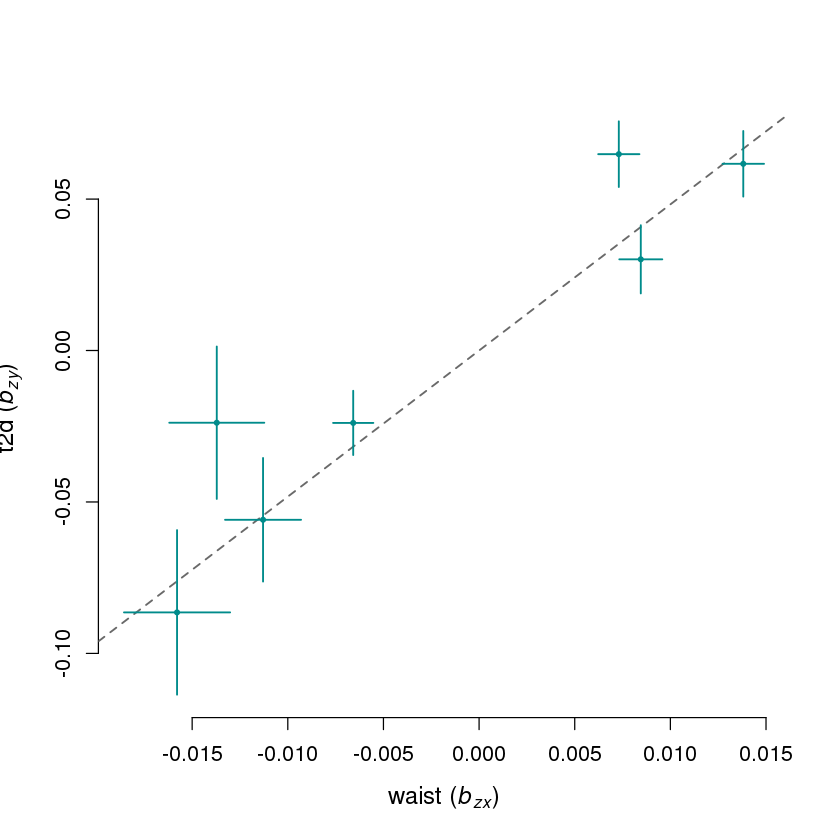

In [72]:

gsmr_data = read_gsmr_data("t2d_gsmr01_result.eff_plot.gz")
gsmr_summary(gsmr_data)      # show a summary of the data
plot_gsmr_effect(gsmr_data, "waist", "t2d", colors()[74])  

In [73]:
head(gsmr_data)

$pheno
[1] "2"      "1"      "waist"  "asthma" "t2d"   

$bxy_result
     Exposure Outcome bxy       se         p             n_snps
[1,] "waist"  "t2d"   "4.82491" "0.695642" "4.03621e-12" "7"   
[2,] "asthma" "t2d"   "NaN"     "NaN"      "NaN"         "NaN" 

$snp_effect
       [,1]                           [,2] [,3] [,4] [,5] [,6]             
strbuf "7:28213499_TAAAAAAAAAAAAAA_T" "1"  "0"  NA   "T"  "TAAAAAAAAAAAAAA"
strbuf "rs10275982"                   "1"  "0"  NA   "A"  "C"              
strbuf "rs11448038"                   "1"  "0"  NA   "TA" "T"              
strbuf "rs11763181"                   "1"  "0"  NA   "G"  "T"              
strbuf "rs552707"                     "1"  "0"  NA   "C"  "T"              
strbuf "rs55901351"                   "1"  "0"  NA   "T"  "C"              
strbuf "rs6963719"                    "1"  "0"  NA   "T"  "C"              
       [,7]       [,8]          [,9]         [,10]          [,11]       
strbuf "0.039207" "-0.0157897"  "0.00277328" "0.0127581"    "0.0197258" 
strbuf "0.337556" "-0.00658053" "0.00105114" "0.00146841"   "0.00747687"
strbuf "0.550049" "0.00730479"  "0.00107761" "0.0373388"    "0.00765055"
strbuf "0.932679" "-0.0112937"  "0.00198594" "-0.00103321"  "0.0141235" 
strbuf "0.704436" "0.013811"    "0.0010836"  "-0.000808671" "0.00771348"
strbuf "0.043161" "-0.0137131"  "0.0024832"  "-0.00950145"  "0.0176564" 
strbuf "0.73644"  "0.00845343"  "0.00112294" "0.0256037"    "0.007958"  
       [,12]        [,13]      
strbuf "-0.0864612" "0.027165" 
strbuf "-0.0238996" "0.0106069"
strbuf "0.0648301"  "0.0108398"
strbuf "-0.0558825" "0.0204014"
strbuf "0.0616489"  "0.0108266"
strbuf "-0.0238387" "0.0251576"
strbuf "0.0301114"  "0.0112592"

### check with other packages
* Mendelian randomization accounting for correlated and uncorrelated pleiotropic effects using genome-wide summary statistics (CAUSE by Morrison et al. 2020)
* MR-Corr2: a two-sample Mendelian randomization method that accounts for correlated horizontal pleiotropy using correlated instrumental variants (by Cheng et al. 2020)

# CAUSE

## Step 1: Format Data for CAUSE

In [1]:
library(readr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library(cause)

In [2]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [ ]:
# import files
t2d<-read.table("/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/t2d_regenie_jazf1", header=TRUE, sep="\t")
waist<-read.table("/mnt/mfs/statgen/bst2126/pleiotropy/JAZF1_sum/waist_regenie_jazf1", header=TRUE, sep="\t")

In [ ]:
# merge sumstats

waist_t2d <- gwas_merge(waist, t2d, snp_name_cols = c("SNP", "SNP"), beta_hat_cols = c("beta", "beta"), se_cols = c("se", "se"), A1_cols = c("A1", "A1"), A2_cols = c("A2", "A2"), pval_cols = c("p", "p"))


Formatting waist
There are  2068  variants.
Removing  2  duplicated variants leaving  2064 variants.
Removing  73  variants with illegal allelse leaving  2064 variants.
Removed  274  variants with ambiguous strand.
Flipping strand and effect allele so A1 is always A
Returning  1790  variants.
Formatting t2d
There are  2067  variants.
Removing  2  duplicated variants leaving  2063 variants.
Removing  73  variants with illegal allelse leaving  2063 variants.
Removed  272  variants with ambiguous strand.
Flipping strand and effect allele so A1 is always A
Returning  1791  variants.
After merging and removing variants with inconsistent alleles,  there are  1748  variants that are present in both studies and can be used with CAUSE.

In [ ]:
> head(waist_t2d)
                 snp   beta_hat_1       seb1  beta_hat_2      seb2    A1 A2
1        rs545409685 -0.000830394 0.00997982 -0.03862570 0.1000360     A  G
2 7:27869261_CAGTA_C  0.018772000 0.01391700 -0.10838600 0.1401650 CAGTA  C
3         rs73075348  0.002466700 0.00213852 -0.01622460 0.0215218     A  G
4          rs6948467 -0.002577480 0.00101531 -0.02054410 0.0102407     A  G
5         rs35410592 -0.003141340 0.00520300  0.00427717 0.0522587     A  C
6        rs183893860 -0.004303300 0.01006870  0.03061410 0.1027550     A  G

## Step 2: Calculate nuisance parameters

The next step is to estimate the parameters that define the prior distribution of βM and θ and to estimate ρ, the correlation between summary statistics that is due to sample overlap or population structure. We will do this with a random subset of 1,000,000 variants since our data set is large. est_cause_params estimates the nuisance parameters by finding the maximum a posteriori estimate of ρ and the mixing parameters when γ=η=0. This step takes a several minutes.

In [ ]:
set.seed(100)
varlist <- with(waist_t2d, sample(snp, size=1000, replace=FALSE))
params <- est_cause_params(waist_t2d, varlist)

In [ ]:
Estimating CAUSE parameters with  1000  variants.

warning: solve(): system is singular (rcond: 1.96014e-17); attempting approx solution

warning: solve(): system is singular (rcond: 2.16109e-17); attempting approx solution

warning: solve(): system is singular (rcond: 2.3458e-17); attempting approx solution

warning: solve(): system is singular (rcond: 2.48475e-17); attempting approx solution

warning: solve(): system is singular (rcond: 4.79447e-17); attempting approx solution

warning: solve(): system is singular (rcond: 5.92671e-17); attempting approx solution
1 0.3088514 
2 0.001381665 
3 4.45504e-05 
4 1.442608e-06 
5 4.674024e-08 
Warning message:
In est_cause_params(waist_t2d, varlist) :
  Fewer than 100,000 variants are being used to estimate parametrs. This can cause problems and is not recomended. You are using 1000 variants.



In [ ]:
> class(params)
[1] "cause_params"
> names(params)
[1] "rho"       "pi"        "mix_grid"  "loglik"    "PIS"       "RHO"      
[7] "LLS"       "converged" "prior"    
> params$rho
[1] 0.3102791

In [ ]:
> head(params$mix_grid)
           S1         S2         pi
1 0.000000000 0.00000000 0.26522462
2 0.000000000 0.04010793 0.04890732
3 0.005212955 0.04010793 0.48521493
4 0.007372232 0.04010793 0.19025707
5 0.007372232 0.08021586 0.01039607

## Step 3: LD Pruning
We estimate CAUSE posterior distributions using an LD pruned set of variants, prioritizing variants with low trait M (waist) p-values.

The easiest way is to use Plink to perform LD clumping. The ieugwasr package provides a convenient R interface to Plink. This method is fast but requires a reference sample which can be accessed through an API using ieugwasr::ld_clump (see help for that function). You can download also download reference data from here. That file will need to be unzipped.

An alternative is to use a built in function in the CAUSE R pacakge and precomputed pairwise estimates of r2. This is the method we used in our paper, coupled with LD estimates 1000 Genomes European samples computed via LDshrink. This method is slow but lets you use any LD estimates you want. We show how to do this in a section at the end of this document.

In either case, we prioritize variants based on their trait 1 p-value. We can limit ourselves to SNPs with trait 1 p-value less than 0.001 since we will use that threshold for estimating the CAUSE posteriors in the next step. If you use a higher threshold in the next step, you should also use a higher threshold in the pruning step. It is ok to have a lower threshold in the posterior estimation step than in the pruning step. In this case, the sumstat data contains p-values se we use these. However, if these are missing we can compute approximate p-values using a normal approximation.



In [ ]:
r2_thresh = 0.01
pval_thresh = 1e-3

waist_t2d_clump <- waist_t2d %>% rename(rsid = snp, pval = p1) %>% ieugwasr::ld_clump(dat =/mnt/mfs/statgen/archive/UKBiobank_Yale_transfer/pleiotropy_geneticfiles/UKB_Caucasians_phenotypeindepqc120319_updated082020removedwithdrawnindiv,clump_r2 = r2_thresh,
                     clump_p = pval_thresh,plink_bin = genetics.binaRies::get_plink_binary(), pop = "EUR")

In [ ]:
download.file("http://fileserve.mrcieu.ac.uk/ld/1kg.v3.tgz",destfile="1kg.v3.tgz")